In [1]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd


In [2]:
files=["IC40_exp.csv","IC59_exp.csv","IC79_exp.csv","IC86_I_exp.csv","IC86_II_exp.csv", 
       "IC86_III_exp.csv","IC86_IV_exp.csv","IC86_V_exp.csv","IC86_VI_exp.csv",
       "IC86_VII_exp.csv"]

In [3]:
data=np.loadtxt("IC40_exp.csv")
for name in files:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T

In [4]:
fields=[log10_E,RA,Dec,Ang_err]
print(Ang_err)
iceang=fields[3]


[0.48 0.62 0.56 ... 0.3  0.21 0.25]


In [5]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [7]:

df=pd.read_csv("TabO1.csv")
print(df)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [8]:
df1=df.rename({'RA':'RA_M'},axis=1)
print(df1)


                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [9]:
import re
def convert_ra_to_comma(ra):#replacing space with comma
    return re.sub(r"\s+", ",",ra.strip())
df1['RA_M_comma'] = df1['RA_M'].apply(convert_ra_to_comma)# Apply the function to the entire RA_M column
def convert_dec_to_comma(dec):
    return re.sub(r"\s+", ",",dec.strip())
df1['dec_M_comma'] = df1['Decl'].apply(convert_dec_to_comma)
    
print(df1[['Name', 'RA_M', 'RA_M_comma', 'Decl','dec_M_comma']])# Show the DataFrame with the new RA_M_Comma column


                     Name            RA_M      RA_M_comma            Decl  \
0   CXOU J010043.1-721134     01 00 43.14     01,00,43.14     -72 11 33.8   
1              4U 0142+61    01 46 22.407    01,46,22.407    +61 45 03.19   
2           SGR 0418+5729    04 18 33.867    04,18,33.867    +57 32 22.91   
3           SGR 0501+4516     05 01 06.76     05,01,06.76    +45 16 33.92   
4             SGR 0526-66     05 26 00.89     05,26,00.89     -66 04 36.3   
5          1E 1048.1-5937     10 50 07.14     10,50,07.14     -59 53 21.4   
6          1E 1547.0-5408  15 50 54.12386  15,50,54.12386  -54 18 24.1141   
7          PSR J1622-4950     16 22 44.89     16,22,44.89     -49 50 52.7   
8             SGR 1627-41    16 35 51.844    16,35,51.844    -47 35 23.31   
9   CXOU J164710.2-455216     16 47 10.20     16,47,10.20    -45 52 16.90   
10  1RXS J170849.0-400910     17 08 46.87     17,08,46.87    -40 08 52.44   
11  CXOU J171405.7-381031     17 14 05.74     17,14,05.74     -38 10 30.9   

In [10]:
def ra_to_degrees(ra_string):
    ra_parts = ra_string.split(',')
    ra_hours = int(ra_parts[0])  # Convert to integer (handles leading zeros)
    ra_minutes = int(ra_parts[1])  # Convert to integer (handles leading zeros)
    ra_seconds = float(ra_parts[2])  # Convert to float
    return (ra_hours * 15) + (ra_minutes / 4) + (ra_seconds / 240)
#field3.loc[:,'RA_M(deg)']=field3['RA_M_comma'].apply(ra_to_degrees)
def dec_to_degrees(dec_string):
    dec_parts = dec_string.split(',')
    dec_degrees = int(dec_parts[0])  # Convert to integer (handles leading zeros)
    dec_minutes = int(dec_parts[1])  # Convert to integer (handles leading zeros)
    dec_seconds = float(dec_parts[2])
    sign = 1 if dec_degrees >= 0 else -1
    return abs(dec_degrees) + (dec_minutes / 60) + (dec_seconds / 3600) * sign
df1['RA_M(deg)'] = df1['RA_M_comma'].apply(ra_to_degrees)
df1['Decl_M(deg)'] = df1['dec_M_comma'].apply(dec_to_degrees)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [11]:
field3=df1[['RA_M(deg)','Decl_M(deg)']]
print(field3)

     RA_M(deg)  Decl_M(deg)
0    15.179750    72.173944
1    26.593363    61.750886
2    64.641113    57.539697
3    75.278167    45.276089
4    81.503708    66.056583
5   162.529750    59.877389
6   237.725516    54.293302
7   245.687042    49.818694
8   248.966017    47.576858
9   251.792500    45.861972
10  257.195292    40.118767
11  258.523917    38.158083
12  266.417350    28.991717
13  272.163904    20.388931
14  272.462862    19.702241
15  274.515417    16.107833
16  275.575000    16.059222
17  278.434875     8.514583
18  278.717158     8.734439
19  280.330596     4.930233
20  283.194458     0.554944
21  286.809708     9.322250
22  293.731657    21.896607
23  345.284562    58.879014
24  118.927000    29.536333
25  270.245833    22.920000
26  272.046667    20.619722
27  274.714083    15.977050
28  281.227833     2.918583
29  303.487083    34.330000
30  281.603917     2.958306


In [12]:
ra_mag=np.array(field3['RA_M(deg)'])
dec_mag=np.array(field3['Decl_M(deg)'])
ice_ra=(fields[1])
ice_dec=(fields[2])
print(ice_ra)
print(ice_dec)
print(ra_mag)
#print(dec_mag)|
len(dec_mag)


[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]
[ 15.17975     26.5933625   64.6411125   75.27816667  81.50370833
 162.52975    237.72551608 245.68704167 248.96601667 251.7925
 257.19529167 258.52391667 266.41735    272.16390417 272.46286233
 274.51541667 275.575      278.434875   278.71715833 280.33059583
 283.19445833 286.80970833 293.7316575  345.2845625  118.927
 270.24583333 272.04666667 274.71408333 281.22783333 303.48708333
 281.60391667]


31

In [13]:
icegrid1,maggrid1=np.meshgrid(ice_ra,ra_mag)
icegrid2,maggrid2=np.meshgrid(ice_dec,dec_mag)
anggrid3,maggrid3=np.meshgrid(iceang,dec_mag)
#print(icegrid1,maggrid1)
paired_ra = np.vstack([icegrid1.ravel(),maggrid1.ravel()])
paired_dec = np.vstack([icegrid2.ravel(),maggrid2.ravel()])
paired_ang=np.vstack([anggrid3.ravel(),maggrid3.ravel()])
ra_ice=paired_ra[0]
dec_ice=paired_dec[0]
ra_mag=paired_ra[1]
dec_mag=paired_dec[1]
ang_ice=paired_ang[0]

ra_icecube_g =np.radians(paired_ra[0])
ra_magnetar_g =np.radians(paired_ra[1])
dec_icecube_g=np.radians(paired_dec[0])
dec_magnetar_g=np.radians(paired_dec[1])
RA_dif=ra_icecube_g-ra_magnetar_g
print(RA_dif)
print(dec_icecube_g )
print(ra_ice)
len(RA_dif)
print(ang_ice)
print(dec_mag)
len(dec_ice)


[ 3.27850064  1.0444792   1.43677686 ...  0.46291513  0.88305079
 -1.19197116]
[ 0.29251718 -0.23336797  0.19704767 ...  0.74251542  0.78051124
  0.0821701 ]
[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[0.48 0.62 0.56 ... 0.3  0.21 0.25]
[72.17394444 72.17394444 72.17394444 ...  2.95830556  2.95830556
  2.95830556]


36311261

In [14]:
Ang_sep=np.arccos(np.sin(dec_icecube_g)*np.sin(dec_magnetar_g)+np.cos(dec_icecube_g)*np.cos(dec_magnetar_g)*np.cos(RA_dif))
print(Ang_sep)


[1.58665926 1.64139233 1.34232506 ... 0.80481426 1.06240721 1.18928222]


In [17]:
declcut=5
decdiff=np.abs(dec_ice-dec_mag)
nuind=np.nonzero(decdiff < declcut)
def sig( declcut):
    decdiff=np.abs(dec_ice-dec_mag)
    nuind=np.nonzero(decdiff < declcut)
    sg=np.radians(ang_ice[nuind])**2
    Ang_sep1=(np.arccos((np.sin(dec_icecube_g[nuind])*np.sin(dec_magnetar_g[nuind])+np.cos(dec_icecube_g[nuind])*np.cos(dec_magnetar_g[nuind])*np.cos(ra_icecube_g[nuind]-ra_magnetar_g[nuind]))))**2
    return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
S=sig( declcut)
#len(nuind[0])
band=5
def bgs(band, twopi = True):
    if twopi == True:
        s_ang = (np.sin(np.radians(dec_mag[nuind] + band)) - np.sin(np.radians(dec_mag[nuind] - band)))*(2 * np.pi)
        return 1/s_ang
    else:
        s_ang = (np.sin(np.deg2rad(dec_mag [nuind]+ band)) - np.sin(np.deg2rad(dec_mag[nuind]- band)))
        return 1/s_ang
B=bgs(band, twopi = True)
def P(x,N,S,B):
    nsN=x/N
    return nsN*S+(1-nsN)*B
def TS(x,N,S,B):
    return 2*np.sum(np.log((P(x,N,S,B)/B)))
declcut=5
band=5
B=bgs(band,twopi=True)
S =(sig(declcut)) 
decdiff=np.abs(dec_ice-dec_mag)
nuind=np.nonzero(decdiff < declcut)
N=len(nuind[0])
print(N)
def ns_for_TSmax(S, B, N):
    declcut=5
    band=5
    B=bgs(band,twopi=True)
    S =(sig(declcut)) 
    nll = lambda x: -TS(x,N,S,B)
    soln = minimize(nll,6,bounds=((0,None),))
    ns = float(soln.x)
    return ns
ns1=ns_for_TSmax(S, B, N)
print(ns1)
print( TS(ns1,N,S,B))
print(S)
print(B)
len(S)
len(B)

3118868
32.44575951696389
0.7275778491637446
[2.00248460e-246 3.37758912e-052 2.54687692e-093 ... 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
[2.98257042 2.98257042 2.98257042 ... 0.91426748 0.91426748 0.91426748]


3118868

In [19]:
def sig( declcut):
    decdiff=np.abs(dec_ice-dec_mag)
    nuind=np.nonzero(decdiff < declcut)
    sg=np.radians(ang_ice[nuind])**2
    Ang_sep1=(np.arccos((np.sin(dec_icecube_g[nuind])*np.sin(dec_magnetar_g[nuind])+np.cos(dec_icecube_g[nuind])*np.cos(dec_magnetar_g[nuind])*np.cos(ra_icecube_g[nuind]-ra_magnetar_g[nuind]))))**2
    return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
def bgs(band, twopi = True):
    if twopi == True:
        s_ang = (np.sin(np.radians(dec_mag[nuind] + band)) - np.sin(np.radians(dec_mag[nuind] - band)))*(2 * np.pi)
        return 1/s_ang
    else:
        s_ang = (np.sin(np.deg2rad(dec_mag + band)) - np.sin(np.deg2rad(dec_mag- band)))
        return 1/s_ang
def P(x,N,S,B):
    nsN=x/N
    return nsN*S+(1-nsN)*B
def TS(x,N,S,B):
    return 2*np.sum(np.log((P(x,N,S,B)/B)))
declcut=5
band=5
B=bgs(band,twopi=True)
S =(sig(declcut)) 
decdiff=np.abs(dec_ice-dec_mag)
nuind=np.nonzero(decdiff < declcut)
N=len(nuind[0])
print(N)


def ns_for_TSmax(S, B, N):
    declcut=5
    band=5
    B=bgs(band,twopi=True)
    S =(sig(declcut)) 
    nll = lambda x: -TS(x,N,S,B)
    soln = minimize(nll,6,bounds=((0,None),))
    ns = float(soln.x)
    return ns
ns1=ns_for_TSmax(S, B, N)

print(ns_for_TSmax(S, B, N))
print( TS(ns1,N,S,B))

3118868
32.44575951696389
0.7275778491637446


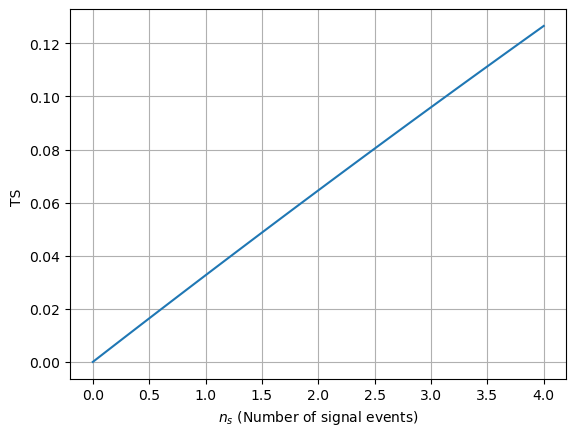

In [26]:
import matplotlib.pyplot as plt
#ns_values = np.linspace(0, 4, 100)
# Calculate TS for each value of ns
TS_values =( [TS(x,N,S,B) for x in ns_values])
#print(TS_values)
# Plot the TS values
plt.plot( ns_values,TS_values)
#plt.text(x=3.5, y=5, s="V780 Tau", fontsize=12, color='black')
plt.xlabel(r'$n_s$ (Number of signal events)')
plt.ylabel('TS ')
#plt.title('TS as a function of $n_s$')
plt.grid(True)
#filered2 = r'C:\Users\DELL\red_dwarf2_likelyhood.png'
#plt.savefig(filered2)